In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('data/loan_prediction.csv')

In [5]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#drop Loan_ID column as its insignificant
data=data.drop(labels=['Loan_ID'],axis=1)

In [8]:
#checking for duplicate records
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
### We need to deal with these null values and also change the datatypes of certain columns

In [11]:
data['Dependents'].unique() #checking for all the unique values of 'Dependents' column

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
# Handling missing values in Dependents column
data['Dependents'].fillna(0, inplace=True)  # Replace missing values with 0
data['Dependents'] = data['Dependents'].replace('3+', 3) #replacing 3+ with 3 
data['Dependents'] = data['Dependents'].astype(int) #changing its datatype from object to int


In [13]:
# if the coapplicant's income is zero, the person is married otherwise unmarried.
data['Married'] = data.Married.fillna(data.apply(lambda x: 'Yes' if x['CoapplicantIncome'] > 0 else 'No', axis=1))

In [14]:
data.groupby('Gender').mean()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,,
Female,0.375000,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,0.820041,5446.460123,1742.932352,149.265957,339.665272,0.847007


In [15]:
data['ApplicantIncome'].mean() #Average income of applicants

5403.459283387622

In [16]:
#we see that the average income of male applicants is almost equal to average income of all the applicants

In [17]:
# if income of an applicant is less than the the average income of all the applicants, then the applicant is considered female, otherwise male 
data['Gender'] = data.Gender.fillna(data.apply(lambda x: 'Female' if x['ApplicantIncome'] < data['ApplicantIncome'].mean() else 'Male', axis=1))


In [18]:
#if the income of co-applicant is 0 then the person is self-employed, otherwise considered not.
data['Self_Employed'] = data.Self_Employed.fillna(data.apply(lambda x: 'Yes' if x['CoapplicantIncome'] == 0 else 'No', axis=1))

In [19]:
data['Loan_Status'] = data['Loan_Status'].astype(str) #converting datatype of loan_status to string


In [20]:
#replacing 'Y' with 1.0 and 'N' with 0.0 for null values in credit_history
data['Credit_History'] = data.apply(lambda row: 1.0 if row['Loan_Status'] == 'Y' else 0.0 if pd.isnull(row['Credit_History']) else row['Credit_History'], axis=1)


In [21]:
#replacing null values with their mean in LoanAmount and Loan_Amount_Term columns
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean()) 

data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [22]:
data.Credit_History.unique()

array([1., 0.])

In [23]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
#we have handled all the null values

<Axes: xlabel='Education', ylabel='count'>

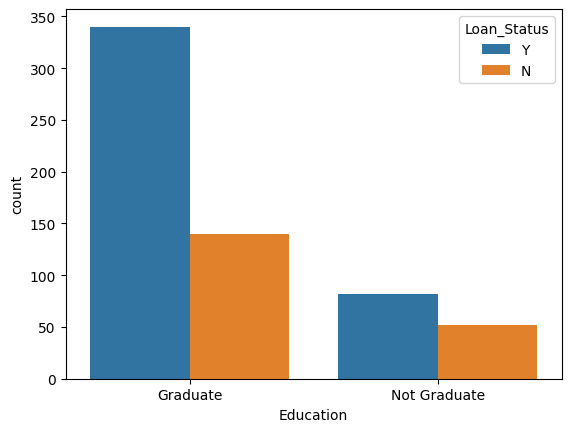

In [25]:
# education and loan status
sns.countplot(x ='Education',hue = 'Loan_Status',data = data)

**Observation:** Graduate applicants have higher chances of getting loan

<Axes: xlabel='Married', ylabel='count'>

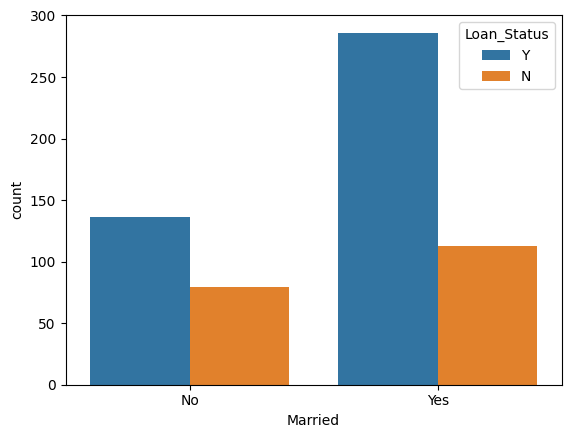

In [26]:
# marital status  and loan status
sns.countplot(x ='Married',hue = 'Loan_Status',data = data)

**Observation:** Married applicants have higher chances of getting loan

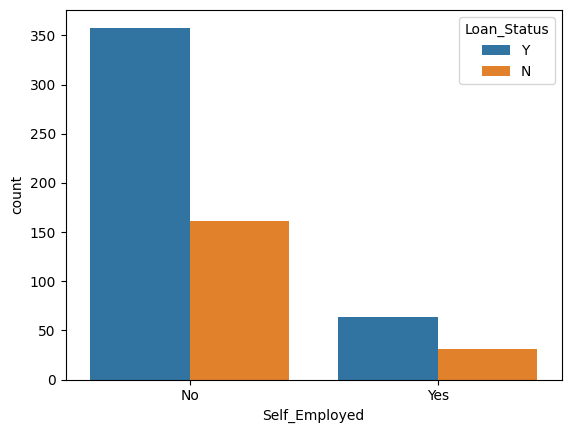

In [27]:
# Self_Employed and loan status
sns.countplot(x ='Self_Employed',hue = 'Loan_Status',data = data)
plt.show()

**Observation:** Self-Employed applicants have lesser  chances of getting loan


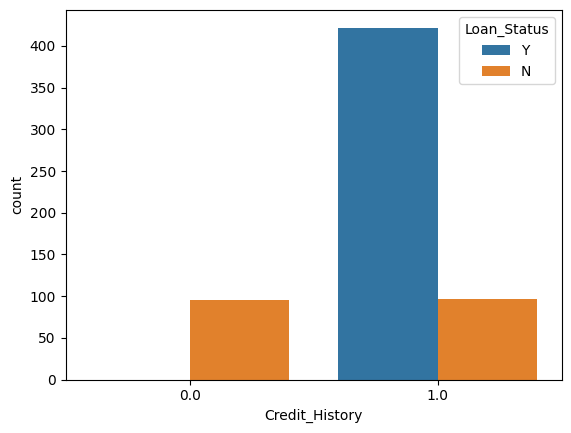

In [28]:
# Credit_History and loan status
sns.countplot(x ='Credit_History',hue = 'Loan_Status',data = data)
plt.show()

**Observation:** Person having no credit history is very less likely to get a loan

                 here 0.0 - No
                      1.0 - Yes


<Axes: >

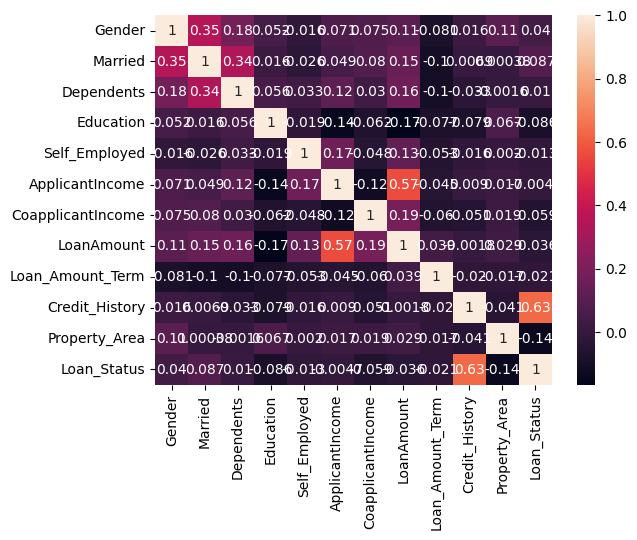

In [45]:
sns.heatmap(data.corr(),annot=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [41]:
#Encoding non-numerical features
data.replace({'Gender':{'Female':0,'Male':1}},inplace=True)
data.replace({'Married':{'Yes':1,'No':0}},inplace=True)
data.replace({'Dependents':{'0':0,'1':1,'2':2,'3+':3}},inplace=True)
data.replace({'Education':{'Graduate':0,'Not Graduate':1}},inplace=True)
data.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)
data.replace({'Credit_History':{'1.0':1,'0.0':0}},inplace=True)
data.replace({'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}},inplace=True)
data.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)



In [31]:
'''loan_status_mapping = {'Y': 1, 'N': 0}
data['Loan_Status'] = data['Loan_Status'].map(loan_status_mapping).astype('Int64')

# Convert remaining missing values to NaN
data['Loan_Status'] = data['Loan_Status'].replace(loan_status_mapping).astype('Int64')'''

"loan_status_mapping = {'Y': 1, 'N': 0}\ndata['Loan_Status'] = data['Loan_Status'].map(loan_status_mapping).astype('Int64')\n\n# Convert remaining missing values to NaN\ndata['Loan_Status'] = data['Loan_Status'].replace(loan_status_mapping).astype('Int64')"

In [42]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 55.3 KB


In [44]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64